# <font color = 'pickle'>**Translation** </font>







## Outline
1. **Setting up the Environment**: Installing necessary libraries and setting up paths.
2. **Exploring and Understanding**: Understanding the structure and content of the dataset.

3. **Data Preprocessing**: Techniques to prepare the data for training, including handling different data splits and tokenization
4. **Training the Model**: Feeding data and adjusting weights.
5. **Translation and Evaluation**: Evaluate model on test set and making predictions.



# <font color = 'pickle'> **Setting up the Environment** </font>

In [1]:
!nvidia-smi

Wed Oct 25 23:16:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount("/content/drive")
    !pip install datasets transformers sentencepiece evaluate wandb accelerate -U -qq
    base_folder = Path("/content/drive/MyDrive/")


from transformers import AutoConfig, AutoModelForSeq2SeqLM, AutoTokenizer, Seq2SeqTrainer
from transformers import AutoTokenizer, DataCollatorForSeq2Seq, pipeline
from datasets import load_dataset, DatasetDict
import evaluate
from evaluate import evaluator


import wandb
import numpy as np
import pandas as pd

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 118.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 113.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 31.4 MB/s eta 0:00:0

# <font color = 'pickle'> **Exploring and Understanding Dataset**

## <font color = 'pickle'> **English_French_Translation**</font>



## <font color = 'pickle'> **Load Data set**
    


In [3]:
kde_dataset = load_dataset('kde4', lang1='en', lang2='fr')

Generating train split:   0%|          | 0/210173 [00:00<?, ? examples/s]

## <font color = 'pickle'> **Understanding your data**

In [4]:
print(kde_dataset)


DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})


## <font color = 'pickle'> **Understanding the datatype of columns**


In [5]:
kde_dataset["train"].features


{'id': Value(dtype='string', id=None),
 'translation': Translation(languages=('en', 'fr'), id=None)}

## <font color = 'pickle'> **Acess indivdual element** </font>
 The dataset behaves like an Python array or list. We can use the familiar indexing/slicing methods to access individual elements.

In [6]:
# get the first example of the dataset
kde_dataset["train"][42]


{'id': '42',
 'translation': {'en': 'The Embedded Media Player',
  'fr': 'Le Lecteur de Média incorporé'}}

The dialogues resemble typical SMS or WhatsApp chats, complete with emojis and spaces for GIFs. The "dialogue" field presents the entire text, while the "summary" field provides the summary of the conversation.

## <font color = 'pickle'> **Exploratory Data Analysis (EDA)**

### <font color = 'pickle'> **Change dataset format to Pandas**  </font>


In [7]:
# This will convert all the splits into Pandas dataframe
kde_dataset.set_format(type="pandas")


In [8]:
# Get all rows from training split
df_train = kde_dataset["train"][:]


In [9]:
df_train.head()


,id,translation
0,0,"{'en': 'Lauri Watts', 'fr': 'Lauri Watts'}"
1,1,"{'en': '& Lauri. Watts. mail;', 'fr': '& Lauri..."
2,2,"{'en': 'ROLES_OF_TRANSLATORS', 'fr': '& traduc..."
3,3,"{'en': '2006-02-26 3.5.1', 'fr': '2006-02-26 3..."
4,4,{'en': 'The Babel & konqueror; plugin gives yo...


In [10]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210173 entries, 0 to 210172
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           210173 non-null  object
 1   translation  210173 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


### <font color = 'pickle'> **Check length of the dialogue/summary** </font>


In [11]:
df_train['words_per_sent_en'] = df_train['translation'].apply(lambda x: len(x['en'].split()))
df_train['words_per_sent_fr'] = df_train['translation'].apply(lambda x: len(x['fr'].split()))

In [12]:
df_train.head()


,id,translation,words_per_sent_en,words_per_sent_fr
0,0,"{'en': 'Lauri Watts', 'fr': 'Lauri Watts'}",2,2
1,1,"{'en': '& Lauri. Watts. mail;', 'fr': '& Lauri...",4,4
2,2,"{'en': 'ROLES_OF_TRANSLATORS', 'fr': '& traduc...",1,2
3,3,"{'en': '2006-02-26 3.5.1', 'fr': '2006-02-26 3...",2,2
4,4,{'en': 'The Babel & konqueror; plugin gives yo...,14,17


#### <font color = 'pickle'> **Plot the distribution of review length** </font>

In [13]:
import matplotlib.pyplot as plt


def plot_two_hists(series1, series2, label1, label2):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first histogram on the left subplot
    axs[0].hist(series1, bins=50, edgecolor="black")
    axs[0].set_xlabel("Number of Words")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Distribution of Words per {label1}")

    # Plot the second histogram on the right subplot
    axs[1].hist(series2, bins=50, edgecolor="black")
    axs[1].set_xlabel("Number of Words")
    axs[1].set_ylabel("Frequency")
    axs[1].set_title(f"Distribution of Words per {label2}")

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Display the plot
    plt.show()


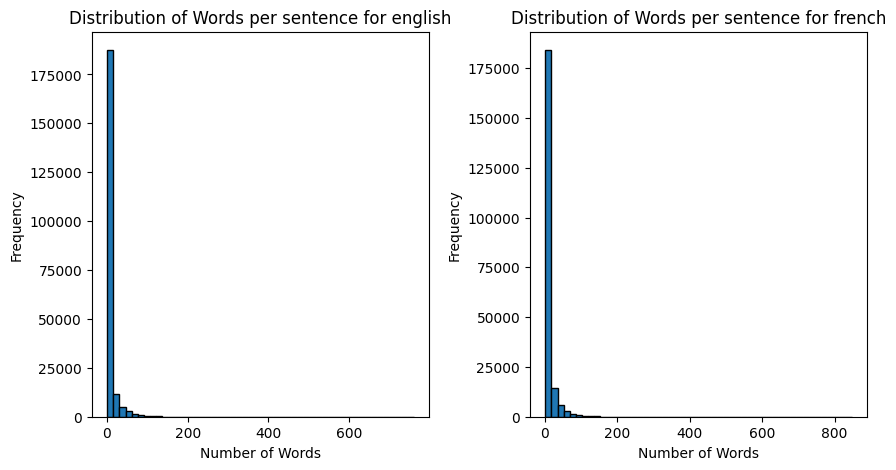

In [14]:
plot_two_hists(
    df_train["words_per_sent_en"], df_train["words_per_sent_fr"], "sentence for english", "sentence for french"
)


In [15]:
df_train["words_per_sent_en"].describe()

count    210173.000000
mean          7.573218
std          14.894992
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max         759.000000
Name: words_per_sent_en, dtype: float64

In [16]:
# Let us check how many sentences ahs more than 500 words

count = (df_train["words_per_sent_en"] > 500).sum()
print(f"Number of sentences with more than 400 words: {count}")


Number of sentences with more than 400 words: 5


In [17]:
# Let us check how many sentences has less than 2 words

count = (df_train["words_per_sent_en"] <2).sum()
print(f"Number of sentences with less than 2 words: {count}")

Number of sentences with less than 2 words: 48165


In [18]:
# Let us check how many sentences has less than 1 word - empty strings

count = (df_train["words_per_sent_en"] <1).sum()
print(f"Number of sentences with less than 2 words: {count}")

Number of sentences with less than 2 words: 0


In [19]:
df_train[df_train["words_per_sent_fr"]<2]

,id,translation,words_per_sent_en,words_per_sent_fr
5,5,"{'en': 'KDE', 'fr': 'KDE'}",1,1
6,6,"{'en': 'kdeaddons', 'fr': 'kdeaddons'}",1,1
7,7,"{'en': 'konqueror', 'fr': 'konqueror'}",1,1
9,9,"{'en': 'babelfish', 'fr': 'babelfish'}",1,1
10,10,"{'en': 'translate', 'fr': 'traduction'}",1,1
...,...,...,...,...
210137,210137,"{'en': 'Games', 'fr': 'JeuxPhonon::'}",1,1
210138,210138,"{'en': 'Accessibility', 'fr': 'Accessibilité'}",1,1
210156,210156,"{'en': 'aRts', 'fr': 'aRts'}",1,1
210161,210161,"{'en': 'Volume', 'fr': 'Volume'}",1,1


### <font color = 'pickle'> **Reset dataset format** </font>


In [20]:
kde_dataset.reset_format()


In [21]:
kde_dataset


DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

# <font color = 'pickle'> **Data Pre-processing**</font>

## <font color = 'indianred'> **Create train, valid, test splits** </font>

In [22]:
test_val_splits = kde_dataset['train'].train_test_split(test_size=0.4, seed=42)
train_split= test_val_splits['train']
test_val_splits = test_val_splits['test'].train_test_split(test_size=0.5, seed=42,)
val_split = test_val_splits['train']
test_split = test_val_splits['test']

## <font color = 'indianred'> **Create small subset for experimentation** </font>


In [23]:
train_split_small = train_split.shuffle(seed=42).select(range(1000))
val_split_small = val_split.shuffle(seed=42).select(range(500))
test_split_small = test_split.shuffle(seed=42).select(range(500))

In [24]:
# combine train, val splits into one dataset
train_val_subset = DatasetDict({'train': train_split_small, 'val': val_split_small})

# create test dataset from test split
test_subset= DatasetDict({'test': test_split_small})

In [25]:
train_val_subset

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 1000
    })
    val: Dataset({
        features: ['id', 'translation'],
        num_rows: 500
    })
})

In [26]:
test_subset

DatasetDict({
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 500
    })
})

In [27]:
train_val_subset["train"]["translation"][1]


{'en': 'Upper Window: View on Printers, both Real and Virtual',
 'fr': "Fenêtre supérieure & #160;: Vue de l'ensemble des imprimantes, réelles et virtuelles"}

## <font color = 'pickle'> **Tokenization**</font>

###  <font color = 'pickle'> **Load pre-trained Tokenizer** </font>

In [84]:
!pip install sacremoses -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=91ee5ff0ba0101bf5c2de5d9b058755dd0c78ba0219bd5b67b0c26b6f0520da7
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses


In [176]:
checkpoint = 'Helsinki-NLP/opus-mt-en-fr'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
# tokenizer??

### <font color = 'pickle'> **Understanding tokenizer**</font>

In [177]:
text = [
    "Upper Window: View on Printers, both Real and Virtual",
    "Fenêtre supérieure & #160;: Vue de l'ensemble des imprimantes, réelles et virtuelles",
]


In [178]:
# get the vocab size
print(f"Pretrained tokenizer vocab size {tokenizer.vocab_size}")


Pretrained tokenizer vocab size 59514


In [179]:
encoded_text = tokenizer(
    text, padding=True, truncation=True, return_tensors="pt")


In [180]:
encoded_text


{'input_ids': tensor([[21364, 38007,    37,  3689,    30, 36712,     9,     2,   533,  7770,
            10, 21821,     0, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513],
        [37412,   501,    62,   746, 32076,  1935,   402, 30362,  2069,    50,
            37,   461,  3773,     5,    14,     6,  8409,   122,  4995,    13,
          3497, 11585,  3172,     9,     2,   906,  1295,    11, 13747,   477,
           114,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

In [181]:
tokens_first_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[0])
tokens_second_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[1])

print(tokens_first_sentence)
print(tokens_second_sentence)


['▁Upper', '▁Window', ':', '▁View', '▁on', '▁Printer', 's', ',', '▁both', '▁Real', '▁and', '▁Virtual', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['▁Fen', 'être', '▁s', 'up', 'érie', 'ure', '▁&', '▁#1', '60', ';', ':', '▁V', 'ue', '▁de', '▁l', "'", 'ense', 'm', 'ble', '▁des', '▁imp', 'rim', 'ante', 's', ',', '▁ré', 'elles', '▁et', '▁virtue', 'll', 'es', '</s>']


In [182]:
tokenizer.convert_tokens_to_string(tokens_first_sentence)


'Upper Window: View on Printers, both Real and Virtual</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>'

In [183]:
tokenizer.convert_tokens_to_string(tokens_second_sentence)

"Fenêtre supérieure & #160;: Vue de l'ensemble des imprimantes, réelles et virtuelles</s>"

In [184]:
special_tokens = tokenizer.all_special_tokens
special_tokens_ids = tokenizer.all_special_ids


In [185]:
import pandas as pd


In [186]:
df = pd.DataFrame(
    {"special_tokens": special_tokens, "special_tokens_ids": special_tokens_ids}
)


In [187]:
pd.set_option("display.max_rows", None)


In [188]:
df


,special_tokens,special_tokens_ids
0,</s>,0
1,<unk>,1
2,<pad>,59513


###  <font color = 'pickle'> **Create function for Tokenizer**

In [189]:
# we do not need to add padding
# padding and conversion to Pytorch Tensor is handled by the data collators
# in more efficient manner

max_length = 128
def tokenize_fn(batch):
    inputs = [example['en'] for example in batch['translation']]
    targets = [example['fr'] for example in batch['translation']]
    model_inputs = tokenizer(text = inputs, text_target=targets, max_length=max_length, truncation=True)
    return model_inputs



###  <font color = 'pickle'> **Use map function to apply tokenization to all splits**

In [190]:
tokenized_dataset = train_val_subset.map(tokenize_fn,
                              batched = True,
                              remove_columns=train_val_subset['train'].column_names)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [191]:
tokenized_dataset.set_format(type="torch")


In [192]:
tokenized_dataset


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1000
    })
    val: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
})

In [193]:
tokenized_dataset["train"].features


{'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'labels': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [194]:
print(len(tokenized_dataset["train"]["input_ids"][2]))
print(len(tokenized_dataset["train"]["input_ids"][1]))


2
13


In [195]:
print(
    tokenizer.convert_ids_to_tokens(
        tokenized_dataset["train"]["input_ids"][0][0:10]
    )
)


['▁I', 'dent', 'ifier', ':', '</s>']


In [196]:
print(
    tokenizer.convert_ids_to_tokens(
        tokenized_dataset["train"]["labels"][0][0:10])
)


['▁Identifiant', '▁&', '▁#160;:', '</s>']


#  <font color = 'pickle'> **Model Training**

##  <font color = 'pickle'> **Model Config File**</font>



In [197]:
config = AutoConfig.from_pretrained(checkpoint)

In [198]:
config

MarianConfig {
  "_name_or_path": "Helsinki-NLP/opus-mt-en-fr",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      59513
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 59513,
  "decoder_vocab_size": 59514,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "forced_eos_token_id": 0,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    

In [199]:
from transformers import GenerationConfig

# generation_config = GenerationConfig.from_model_config(config)
generation_config = GenerationConfig.from_pretrained(checkpoint)


In [200]:
generation_config


GenerationConfig {
  "bad_words_ids": [
    [
      59513
    ]
  ],
  "bos_token_id": 0,
  "decoder_start_token_id": 59513,
  "eos_token_id": 0,
  "forced_eos_token_id": 0,
  "max_length": 512,
  "num_beams": 4,
  "pad_token_id": 59513,
  "renormalize_logits": true
}

##  <font color = 'pickle'> **Download pre-trained model**

In [201]:
model = AutoModelForSeq2SeqLM.from_pretrained(
    checkpoint,
    config=config,
)


## <font color = 'pickle'> **Model Input/Collate Function** </font>

In [202]:
data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
)


In [203]:
train_val_subset['train'][100]


{'id': '34366',
 'translation': {'en': 'Basic Command Set',
  'fr': 'Ensemble de commandes basiques'}}

In [204]:
features = [tokenized_dataset["train"][i] for i in range(3)]
features


[{'input_ids': tensor([  47, 9314, 8245,   37,    0]),
  'attention_mask': tensor([1, 1, 1, 1, 1]),
  'labels': tensor([41612,   402, 38492,     0])},
 {'input_ids': tensor([21364, 38007,    37,  3689,    30, 36712,     9,     2,   533,  7770,
             10, 21821,     0]),
  'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'labels': tensor([  304,   162,   501,  4517,   402, 38492, 14781,     5,    14,     6,
           1420,    13, 29719,     9,     2, 12782,    11, 18769,     9,     0])},
 {'input_ids': tensor([41704,     0]),
  'attention_mask': tensor([1, 1]),
  'labels': tensor([12323,     0])}]

In [205]:
model_input = data_collator(features)
model_input.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

<font color='indianred'>• Notice that data_collator has added the <strong>decoder_input_ids</strong></font>


In [206]:
print(model_input)


{'input_ids': tensor([[   47,  9314,  8245,    37,     0, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513],
        [21364, 38007,    37,  3689,    30, 36712,     9,     2,   533,  7770,
            10, 21821,     0],
        [41704,     0, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'labels': tensor([[41612,   402, 38492,     0,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100],
        [  304,   162,   501,  4517,   402, 38492, 14781,     5,    14,     6,
          1420,    13, 29719,     9,     2, 12782,    11, 18769,     9,     0],
        [12323,     0,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100]])

<font color='indianred'>• **Note that 59513 is both the start token and pad token for the decoder input ids**</font>

<font color='indianred'>•  **Also note that decoder input ids are shifted version of the labels**


In [207]:
print(model_input.decoder_input_ids[0][0:10])
print(model_input.labels[0][0:10])

tensor([59513, 41612,   402, 38492,     0, 59513, 59513, 59513, 59513, 59513])
tensor([41612,   402, 38492,     0,  -100,  -100,  -100,  -100,  -100,  -100])


In [208]:
print(model_input.decoder_input_ids[0][-20:])
print(model_input.labels[0][-20:])


tensor([59513, 41612,   402, 38492,     0, 59513, 59513, 59513, 59513, 59513,
        59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513])
tensor([41612,   402, 38492,     0,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100])


In [209]:
print(model_input.decoder_input_ids[1][0:10])
print(model_input.labels[1][0:10])


tensor([59513,   304,   162,   501,  4517,   402, 38492, 14781,     5,    14])
tensor([  304,   162,   501,  4517,   402, 38492, 14781,     5,    14,     6])


In [210]:
print(model_input.decoder_input_ids[1][-20:])
print(model_input.labels[1][-20:])


tensor([59513,   304,   162,   501,  4517,   402, 38492, 14781,     5,    14,
            6,  1420,    13, 29719,     9,     2, 12782,    11, 18769,     9])
tensor([  304,   162,   501,  4517,   402, 38492, 14781,     5,    14,     6,
         1420,    13, 29719,     9,     2, 12782,    11, 18769,     9,     0])


In [211]:
print(tokenizer.convert_ids_to_tokens(model_input.decoder_input_ids[0][0:10]))
print(tokenizer.convert_ids_to_tokens(model_input.labels[0][0:10]))


['<pad>', '▁Identifiant', '▁&', '▁#160;:', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['▁Identifiant', '▁&', '▁#160;:', '</s>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>']


In [212]:
print(tokenizer.convert_ids_to_tokens(model_input.decoder_input_ids[0][-20:]))
try:
    print(tokenizer.convert_ids_to_tokens(model_input.labels[0][-20:]))
except:
    print(f"No tokens corresponding to ids")


['<pad>', '▁Identifiant', '▁&', '▁#160;:', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['▁Identifiant', '▁&', '▁#160;:', '</s>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>']


##  <font color = 'pickle'> **Understanding Model Output**


In [213]:
# model output
model_output = model(**model_input)


In [214]:
# keys in model output
model_output.keys()


odict_keys(['loss', 'logits', 'encoder_last_hidden_state'])

In [215]:
# let us look at logits
model_output.logits.shape

torch.Size([3, 20, 59514])

In [216]:
logits = model_output.logits.detach().cpu().numpy()

In [217]:
# Greedy decoding
preds = np.argmax(logits, axis = -1)

In [218]:
preds.shape

(3, 20)

In [219]:
preds

array([[16235,    37, 38492,     0,     0,     0,     0,     0,     0,
           47,    47,    47,    47,    47,    47,    47,    47,    47,
           47,    47],
       [  304,   162,   501,  4517,    78, 38492,   498,    36,    14,
            6, 41599,    13, 29719,     9,     2, 12782,    11, 18769,
            9,     0],
       [12323,     0,     0,     0,     0,     0, 12323, 12323, 12323,
        12323, 12323, 12323, 12323, 12323, 12323, 12323, 12323, 12323,
        12323, 12323]])

In [220]:
tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(preds[0]))

'Identification: #160;:</s> </s> </s> </s> </s> </s> I I I I I I I I I I I'

In [221]:
def get_label_strings(labels):
    return tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(labels))

In [222]:
labels = [get_label_strings(label) for label in model_input['labels']]

In [223]:
labels

['Identifiant & #160;:</s> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 "Fenêtre supérieure & #160;: Vue de l'ensemble des imprimantes, réelles et virtuelles</s>",
 'Aperçu</s> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>']

In [224]:
preds = [ get_label_strings(pred) for pred in preds]
preds

['Identification: #160;:</s> </s> </s> </s> </s> </s> I I I I I I I I I I I',
 "Fenêtre supérieure : #160;: vue sur l'imprimante des imprimantes, réelles et virtuelles</s>",
 'Aperçu</s> </s> </s> </s> </s> Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu Aperçu']

In [225]:
final_string_preds=[]
for example in preds:
    string_preds =[]
    for s in example.split():
        string_preds.append(s)
        if '</s>' in s:
            break
    final_string_preds.append(' '.join(string_preds))

final_string_preds

['Identification: #160;:</s>',
 "Fenêtre supérieure : #160;: vue sur l'imprimante des imprimantes, réelles et virtuelles</s>",
 'Aperçu</s>']

In [226]:
# generate prediction from logits using beam search
generated_predictions = model.generate(
    **model_input, generation_config=generation_config, max_length=128
)


In [227]:
generated_predictions.shape


torch.Size([3, 25])

In [228]:
generated_predictions


tensor([[59513, 41612,   402, 38492,     0, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
            47,  9314, 18458,    37,     0],
        [59513,   304,   162,   501,  4517,   402, 38492, 14781,     5,    14,
             6,  1420,    13, 29719,     9,     2, 12782,    11, 18769,     9,
             0, 59513, 59513, 59513, 59513],
        [59513, 12323,     0, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         12323,     0, 59513, 59513, 59513]])

In [229]:
generated_predictions.shape


torch.Size([3, 25])

In [230]:
tokens = tokenizer.convert_ids_to_tokens(generated_predictions[0])
print(tokens)


['<pad>', '▁Identifiant', '▁&', '▁#160;:', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '▁I', 'dent', 'ificateur', ':', '</s>']


In [231]:
translation = tokenizer.convert_tokens_to_string(tokens)
print(translation)


<pad> Identifiant & #160;:</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> Identificateur:</s>


In [232]:
tokenizer.decode(generated_predictions[1])


"<pad> Fenêtre supérieure & #160;: Vue de l'ensemble des imprimantes, réelles et virtuelles</s> <pad> <pad> <pad> <pad>"

In [233]:
tokenizer.decode(generated_predictions[1], skip_special_tokens=True)


"Fenêtre supérieure & #160;: Vue de l'ensemble des imprimantes, réelles et virtuelles"

In [234]:
# decode tokens to generate translation
tokenizer.batch_decode(generated_predictions)


['<pad> Identifiant & #160;:</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> Identificateur:</s>',
 "<pad> Fenêtre supérieure & #160;: Vue de l'ensemble des imprimantes, réelles et virtuelles</s> <pad> <pad> <pad> <pad>",
 '<pad> Aperçu</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> Aperçu</s> <pad> <pad> <pad>']

In [235]:
# decode tokens to generate summary
tokenizer.batch_decode(generated_predictions, skip_special_tokens=True)


['Identifiant & #160;: Identificateur:',
 "Fenêtre supérieure & #160;: Vue de l'ensemble des imprimantes, réelles et virtuelles",
 'Aperçu Aperçu']

##  <font color = 'pickle'> **Evaluation metric(s)** </font>

### <font color = 'pickle'> **Function to compute metric** </font>


In [157]:
!pip install sacrebleu bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.1 MB/s eta 0:00:00


In [236]:
bleu_metric = evaluate.load("sacrebleu")
bert_metric = evaluate.load('bertscore')

def compute_metrics(preds_and_labels):
    # CODE HERE

    preds, labels = preds_and_labels

    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds_cleaned = [pred.strip() for pred in decoded_preds]
    decoded_labels_cleaned = [label.strip() for label in decoded_labels]

    bleu_score = bleu_metric.compute(predictions=decoded_preds_cleaned, references=decoded_labels_cleaned)
    # bert_score = bert_metric.compute(predictions=decoded_preds_cleaned, references=decoded_labels_cleaned,model_type='microsoft/deberta-xlarge-mnli')
    bert_score = bert_metric.compute(predictions=decoded_preds_cleaned, references=decoded_labels_cleaned,lang='en')

    return {"bleu_score" : bleu_score['score'], 'bert_score' : np.mean(bert_score['f1'])}

In [237]:
# Create dummy input
preds = np.random.randint(0, 100, size=(10, 5))
labels = np.random.randint(-100, 100, size=(10, 5))

# Call the function with the dummy input
output = compute_metrics((preds, labels))

# Print the output
print(output)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'bleu_score': 0.3477986533874783, 'bert_score': 0.806513500213623}


In [240]:
output.keys()

dict_keys(['bleu_score', 'bert_score'])

## <font color = 'pickle'> **Set up Logger for experiments**</font>


In [ ]:
wandb.login()
# Set project name for logging
%env WANDB_PROJECT = nlp_course-translation

## <font color = 'pickle'> **Hyperparameters and Checkpointing**</font>

In [243]:
from transformers import Seq2SeqTrainingArguments

# Define the directory where model checkpoints will be saved
model_folder = base_folder/'models/translation/kde4/opus-mt-en-fr'

# Create the directory if it doesn't exist
model_folder.mkdir(exist_ok=True, parents=True)

# Configure training parameters
training_args = Seq2SeqTrainingArguments(
    # Training-specific configurations
    num_train_epochs=1,  # Total number of training epochs
    weight_decay=0.01,  # Apply L2 regularization to prevent overfitting
    learning_rate=5e-5,  # Step size for the optimizer during training
    optim="adamw_torch",  # Optimizer,
    warmup_steps=10,
    predict_with_generate=True,
    generation_config=generation_config,
    # memory and speed related arguments
    # Number of samples per training batch for each device
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,  # Number of samples per eval batch for each device

    gradient_checkpointing=True,  # memory
    fp16 = True, # Speed
    # bf16=True,
    # tf32=True, # speed
    # evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    evaluation_strategy="steps",  # Evaluate model at specified step intervals
    eval_steps=10,  # Perform evaluation every 10 training steps
    # Checkpoint settings
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=10,  # Save a model checkpoint every 10 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints
    metric_for_best_model="bleu_score",
    greater_is_better= True,
    # Experiment logging configurations (commented out in this example)
    logging_strategy="steps",
    logging_steps=10,
    report_to="wandb",  # Log metrics and results to Weights & Biases platform
    # Experiment name for Weights & Biases
    run_name="translation-exp1",
)


##  <font color = 'pickle'> **Initialize Trainer**</font>

In [244]:
# initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["val"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    data_collator=data_collator,
)


##  <font color = 'pickle'> **Start Training**

In [245]:
import gc
import torch
torch.cuda.empty_cache()
gc.collect()


8470

In [246]:
trainer.train()  # start training


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss,Bleu Score,Bert Score
10,2.013200,1.686344,38.689715,0.917639
20,1.758800,1.611699,35.915266,0.917784
30,1.685700,1.564540,40.958581,0.919678
40,1.449800,1.543615,40.935983,0.920052
50,1.444800,1.531041,41.009781,0.919953
60,1.515000,1.523605,41.024398,0.920314


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

TrainOutput(global_step=63, training_loss=1.6350203241620744, metrics={'train_runtime': 682.87, 'train_samples_per_second': 1.464, 'train_steps_per_second': 0.092, 'total_flos': 15072060506112.0, 'train_loss': 1.6350203241620744, 'epoch': 1.0})

##  <font color = 'pickle'> **Evaluation**

### <font color = 'pickle'> **Check performance on validation set**</font>

In [247]:
trainer.evaluate(tokenized_dataset["val"])

{'eval_loss': 1.5236053466796875,
 'eval_bleu_score': 41.024397633940005,
 'eval_bert_score': 0.9203143768310547,
 'eval_runtime': 127.6092,
 'eval_samples_per_second': 3.918,
 'eval_steps_per_second': 0.251,
 'epoch': 1.0}

In [248]:
wandb.finish()  # stop logging

eval/bert_score,▁▁▆▇▇██
eval/bleu_score,▅▁█████
eval/loss,█▅▃▂▁▁▁
eval/runtime,▁█▁▅▆██
eval/samples_per_second,█▁▇▃▂▁▁
eval/steps_per_second,█▁▇▃▂▁▁
train/epoch,▁▁▂▂▄▄▅▅▆▆████
train/global_step,▁▁▂▂▄▄▅▅▆▆████
train/learning_rate,██▆▅▃▁
train/loss,█▅▄▁▁▂
train/total_flos,▁


### <font color = 'pickle'> **Check the best saved model**</font>

In [249]:
# After training, let us check the best checkpoint
# We need this for Predioctions and Evaluations
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split("-")[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")


The best model was saved at step 60.


#  <font color = 'pickle'> **Inference**

## <font color = 'pickle'> **Test Set Evaluation**

In [250]:
model_folder = base_folder/'models/translation/kde4/opus-mt-en-fr'
checkpoint = str(model_folder / "checkpoint-60")
test_subset


DatasetDict({
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 500
    })
})

In [251]:
test_data_flattened = test_subset["test"].map(lambda example: {'en': example['translation']['en'], 'fr': example['translation']['fr']})


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [252]:
test_data_flattened

Dataset({
    features: ['id', 'translation', 'en', 'fr'],
    num_rows: 500
})

In [253]:
task_evaluator = evaluator("translation")
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 128}
eval_results = task_evaluator.compute(
    model_or_pipeline=checkpoint,
    tokenizer=checkpoint,
    data=test_data_flattened,
    input_column='en',
    label_column='fr',
    generation_kwargs=gen_kwargs,
    device=0,
)


Your input_length: 130 is bigger than 0.9 * max_length: 128. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


In [254]:
eval_results

{'bleu': 0.4262387763771888,
 'precisions': [0.7092651757188498,
  0.5356376638855781,
  0.42049656629688326,
  0.3278784336645237],
 'brevity_penalty': 0.8909722831852108,
 'length_ratio': 0.8965056329959901,
 'translation_length': 4695,
 'reference_length': 5237,
 'total_time_in_seconds': 135.114552946,
 'samples_per_second': 3.700563626183409,
 'latency_in_seconds': 0.270229105892}

##  <font color = 'pickle'> **Prediction for individual or small list of examples**

## <font color = 'pickle'> **Create pipelne for inference**

In [255]:
custom_pipeline = pipeline(
    task="translation",
    model=checkpoint,
    tokenizer=checkpoint,
    device='cpu',
    framework = 'pt'
)


In [256]:
sample = test_data_flattened["en"][420]
sample


'Find matching recipes'

In [257]:
translation = custom_pipeline(sample)
translation

[{'translation_text': 'Trouver des recettes correspondantes'}]

In [258]:
samples = test_data_flattened["en"][420:423]
samples


['Find matching recipes',
 '%1x%2x%3 brick, %4 shuffling moves',
 'The following sections will describe, in detail, each element. Everything from where they can go to what goes in them is layed out in an easy-to-follow manner.']

In [259]:
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 128}
translations = custom_pipeline(samples, **gen_kwargs)
translations


[{'translation_text': 'Trouver des recettes correspondantes'},
 {'translation_text': '%1x%2x%3 brique, %4 mouvements de shuffling'},
 {'translation_text': "Les sections suivantes décrivent, en détail, chaque élément. Tout de l'endroit où ils peuvent aller à ce qui s'y passe est exposé de manière facile à suivre."}]

## <font color = 'pickle'> **Prediction for large dataset**

In [260]:
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 400}
custom_pipeline = pipeline(
    task="translation",
    model=checkpoint,
    tokenizer=checkpoint,
    device=0,
    framework = 'pt'
)
translations = custom_pipeline(test_data_flattened['en'], **gen_kwargs, batch_size=16)

In [261]:
translations

[{'translation_text': 'Haut de la page & Y & #160;:'},
 {'translation_text': '–'},
 {'translation_text': 'Capitaliser le texte sélectionné ou le mot courant.'},
 {'translation_text': 'Ouvrir & konqueror;.'},
 {'translation_text': 'Chemins de recherche'},
 {'translation_text': 'Réduire à Grayscale'},
 {'translation_text': "L'utilisateur ne peut modifier aucun paramètre sur cette page."},
 {'translation_text': 'Générer'},
 {'translation_text': 'Vietnamien (Vietnam)'},
 {'translation_text': 'Sélectionner le style à importer & #160;:'},
 {'translation_text': 'Cisco - Hub'},
 {'translation_text': "Impossible de lire l'en-tête de la base de données %1."},
 {'translation_text': 'Serveur trouvé, connexion...'},
 {'translation_text': 'Hôte'},
 {'translation_text': 'Envoyer un & fichier'},
 {'translation_text': 'toute la journée'},
 {'translation_text': 'exameneur; examenseur; Em'},
 {'translation_text': "L'alias est le nom que vous voulez donner à votre compte. Il doit être unique. Vous pouvez 